In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_excel(r"C:\Users\parul\OneDrive\Desktop\Data Set\ML- Dataset for healthcare\1645792390_cep1_dataset (1).xlsx")

## 1. Preliminary Analysis..

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
## Output/ Target variable...2 classes.

df["target"].unique()

array([1, 0], dtype=int64)

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.isnull().sum()

## No missing values found..

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df= df.drop_duplicates(keep='first').reset_index()

In [10]:
df.shape ## Duplicated row deleted...

(302, 15)

## 2.  Data Exploration..

In [11]:
df= df.drop("index", axis= 1)

In [12]:
## a.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
## b.

df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

C:\Users\parul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

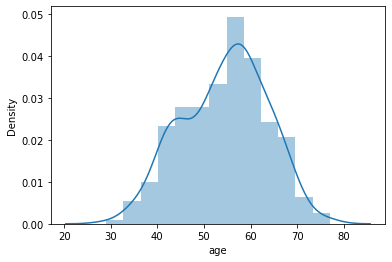

In [14]:
## c.

import seaborn as sns
sns.distplot(df["age"])

In [15]:
## d.

df["sex"].value_counts() ## Here Male= 1 & Female= 0...


1    206
0     96
Name: sex, dtype: int64

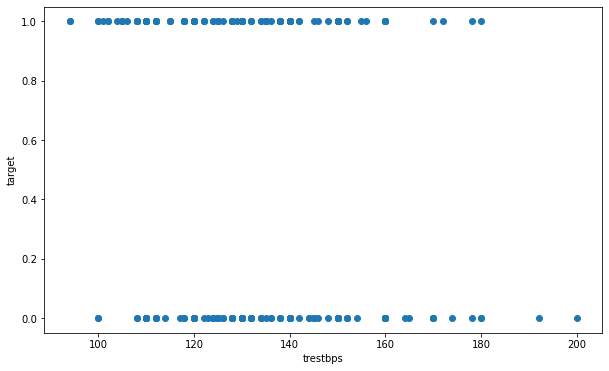

In [16]:
## e.
# Scatter plot
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['trestbps'], df['target'])
# x-axis label
ax.set_xlabel('trestbps')
# y-axis label
ax.set_ylabel('target')
plt.show()

In [17]:
## f.
df.groupby("target")["chol"].agg(["mean","median","count"])

,mean,median,count
target,,,
0,251.086957,249.0,138
1,242.640244,234.5,164


In [18]:
df['target'].corr(df['chol'])

-0.08143720051844144

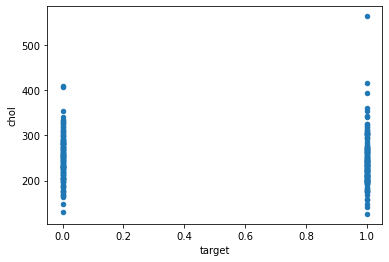

In [19]:
df.plot (x='target', y='chol', kind='scatter') 
plt.show ()

In [20]:
## g.
df.groupby(["target","slope"]).mean()

age       sex        cp    trestbps        chol       fbs  \
target slope                                                                    
0      0      57.250000  0.750000  0.083333  140.750000  240.416667  0.250000   
       1      57.000000  0.791209  0.516484  135.142857  253.758242  0.164835   
       2      55.342857  0.942857  0.514286  130.285714  247.800000  0.114286   
1      0      52.888889  0.777778  2.222222  137.777778  234.000000  0.333333   
       1      54.428571  0.469388  1.306122  126.448980  240.510204  0.081633   
       2      51.707547  0.584906  1.330189  129.820755  244.358491  0.150943   

               restecg     thalach     exang   oldpeak        ca      thal  
target slope                                                                
0      0      0.500000  135.000000  0.666667  3.375000  0.916667  2.500000  
       1      0.461538  133.483516  0.604396  1.732967  1.219780  2.538462  
       2      0.400000  155.114286  0.371429  0.588571  1.114286  2.571429  
1      0      0.444444  158.111111  0.111111  1.833333  0.111111  2.111111  
       1      0.510204  150.081633  0.183673  0.863265  0.265306  2.122449  
       2      0.641509  162.235849  0.122642  0.352830  0.396226  2.122642

In [21]:
df['target'].corr(df['slope'])

0.34393953248938886

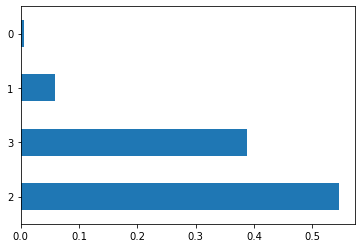

In [22]:
## h.
df.thal.value_counts(normalize=True)

#plot the bar graph of percentage age categories
df.thal.value_counts(normalize=True).plot.barh()
plt.show()

In [23]:
## h.
df["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

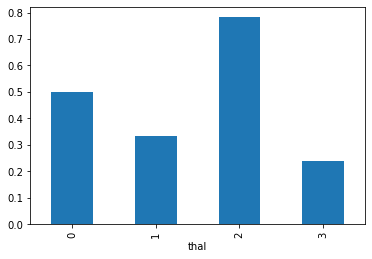

In [24]:
df.groupby('thal')['target'].mean().plot.bar()
plt.show()

In [25]:
df['target'].corr(df['thal']) ## We can see that "thal" is negatively correlated to CVD..

-0.3431007123895653

In [26]:
## i.
df.corr() ## Checking the relation of the target variable with all the the features..

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

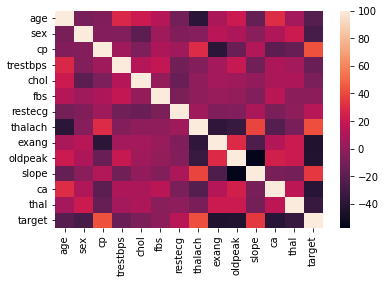

In [27]:
corr= round(df.corr()*100,2)
sns.heatmap(corr)

## 'Target' variable has high positive correlation with features like..'cp', 'thalach' & 'slope'..
## ..and high negative correlation with variables like..'ca', 'oldpeak', 'thal','exang'...

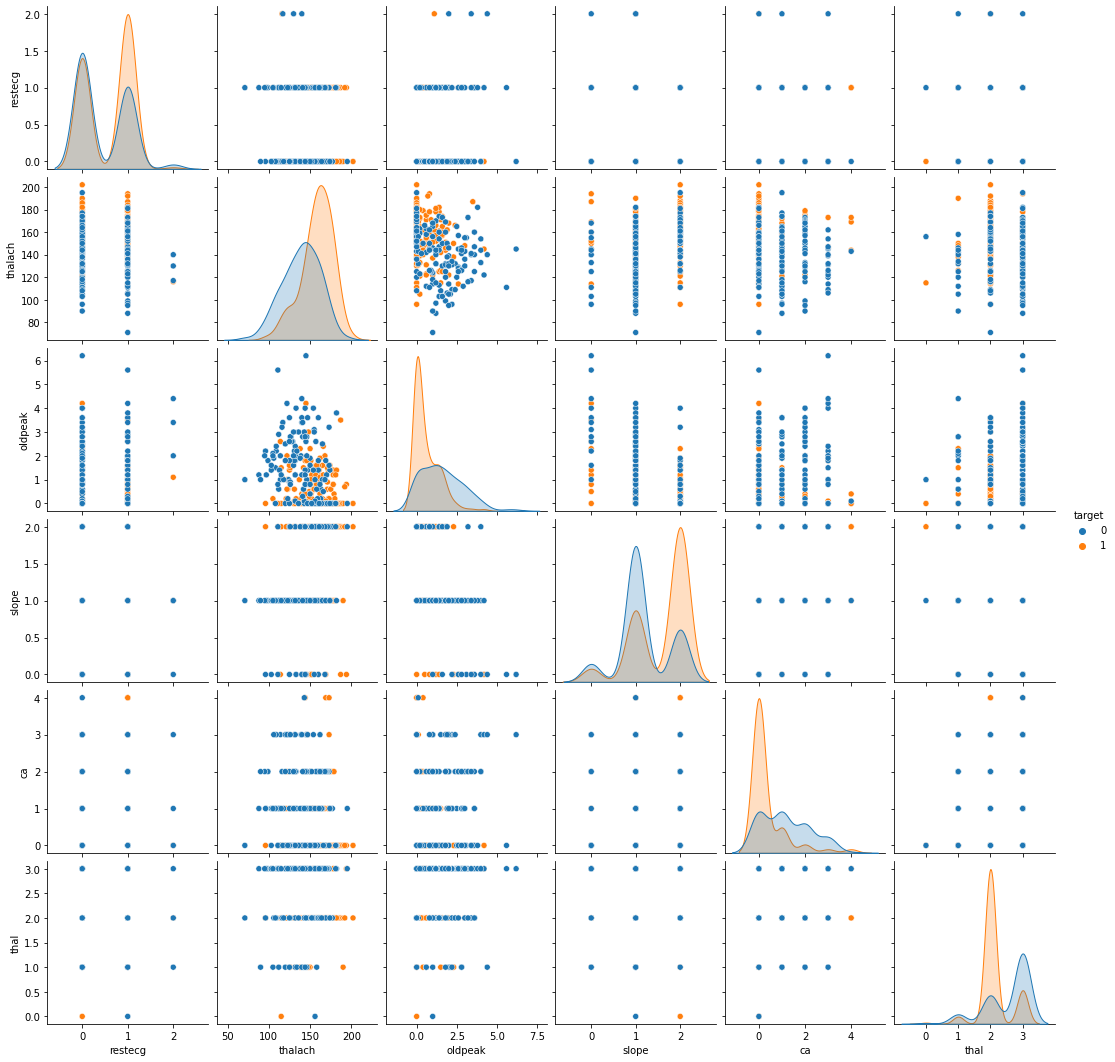

In [28]:
## j.

sns.pairplot(data = df, vars=['restecg','thalach','oldpeak','slope','ca','thal'], hue="target")
plt.show()

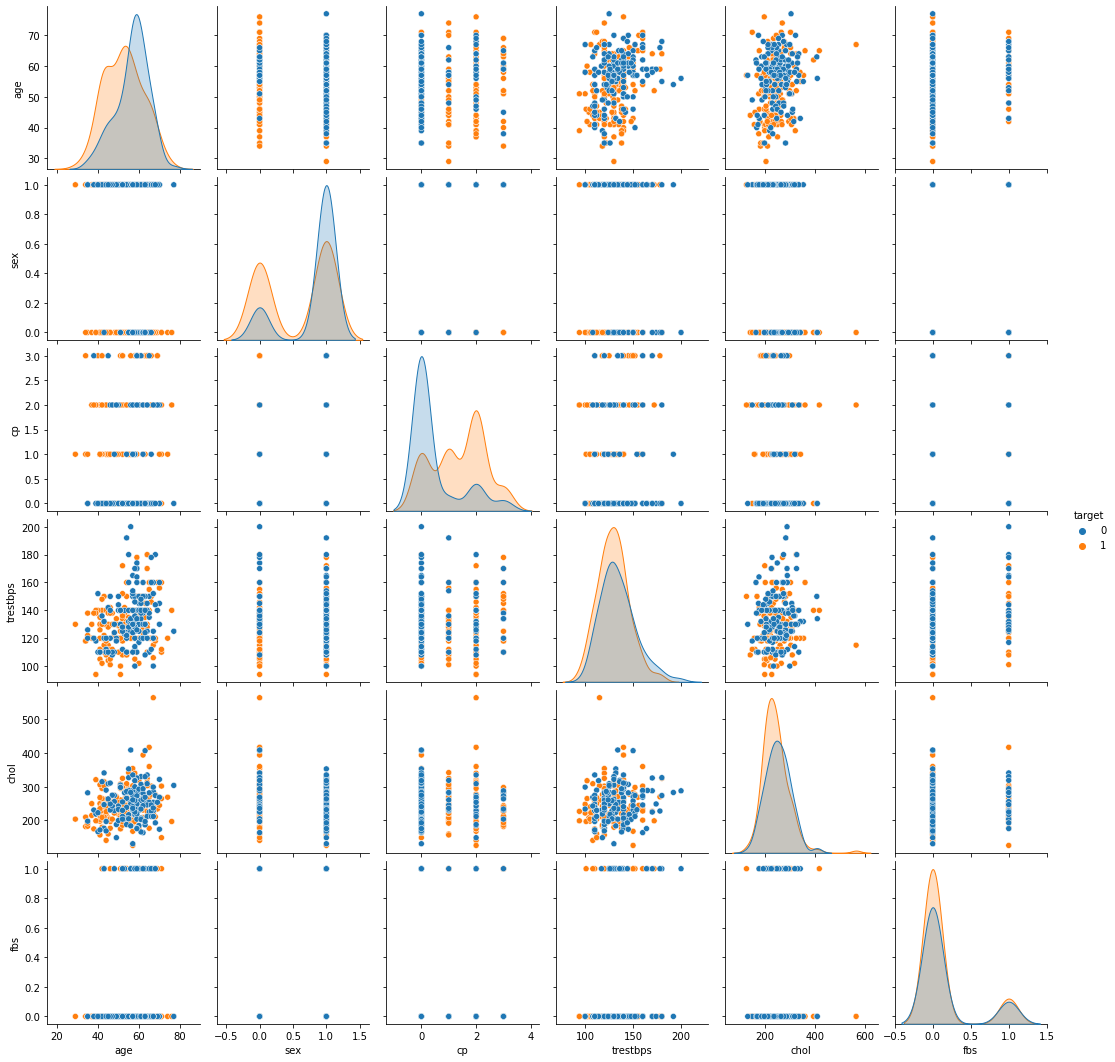

In [29]:
sns.pairplot(data = df, vars=['age','sex','cp','trestbps','chol','fbs'], hue= "target")
plt.show()

## Data is Non-Linear in nature...

## 3. Model Building..

### Logistic regression

In [30]:
## Check for Skeweness..
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='ca', ylabel='Count'>

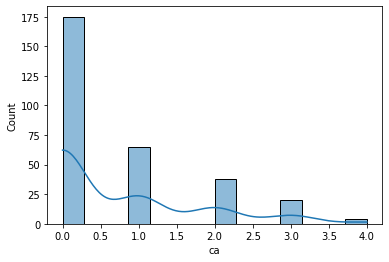

In [31]:
sns.histplot(df["ca"],kde=True)

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

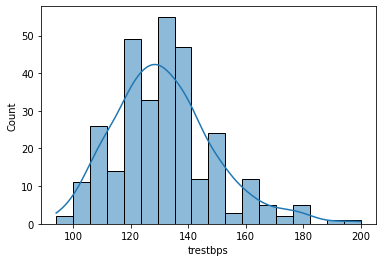

In [32]:
sns.histplot(df["trestbps"],kde=True)

<AxesSubplot:xlabel='thalach', ylabel='Count'>

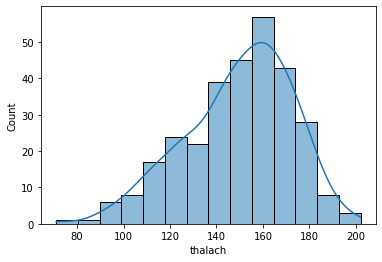

In [33]:
sns.histplot(df["thalach"],kde=True)

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

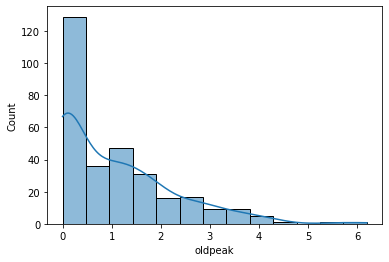

In [34]:
sns.histplot(df["oldpeak"],kde=True)

<AxesSubplot:xlabel='chol', ylabel='Count'>

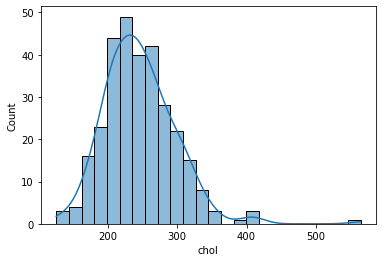

In [35]:
sns.histplot(df["chol"],kde=True)

<AxesSubplot:xlabel='thal', ylabel='Count'>

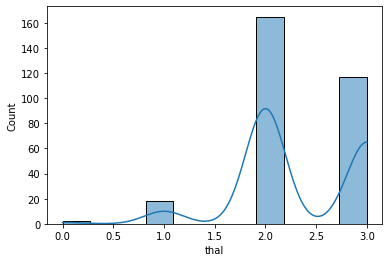

In [36]:
sns.histplot(df["thal"],kde=True)

In [37]:
## Transformations..

df["restecg"]= np.log1p(df["restecg"])
df["thalach"]= np.log1p(df["thalach"])
df["oldpeak"]= np.log1p(df["oldpeak"])
df["chol"]= np.log1p(df["chol"])
df["ca"]= np.log1p(df["ca"])

<AxesSubplot:xlabel='chol', ylabel='Count'>

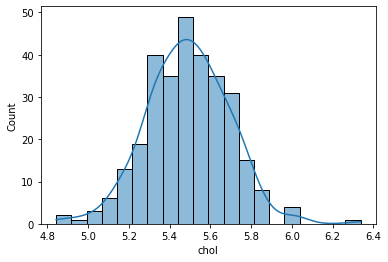

In [38]:
sns.histplot(df["chol"],kde=True) ## Checking the result of transformations on the variable..

In [39]:
df.describe() ## Checking the result after transformations..
## 'chol','oldpeak','thalach'..etc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,5.490794,0.149007,0.361125,5.001778,0.327815,0.571831,1.397351,0.400548,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,0.202452,0.356686,0.355274,0.163554,0.470196,0.524174,0.616274,0.507218,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,4.844187,0.000000,0.000000,4.276666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,5.356586,0.000000,0.000000,4.899699,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,5.486867,0.000000,0.693147,5.033695,0.000000,0.587787,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,5.619493,0.000000,0.693147,5.117994,1.000000,0.955511,2.000000,0.693147,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,6.336826,1.000000,1.098612,5.313206,1.000000,1.974081,2.000000,1.609438,3.000000,1.000000


In [40]:
## Scaling..

df1= df.copy()
df1= df1.drop("target", axis=1) ## Target variable is dropped..

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
mn= MinMaxScaler()
df_new= mn.fit_transform(df1)

In [43]:
df_new1= pd.DataFrame(df_new, index= df1.index, columns= df1.columns) 

In [44]:
df_new1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.409432,1.0,0.00000,0.714506,0.0,0.604799,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.456417,0.0,0.63093,0.925942,0.0,0.761913,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.320790,0.0,0.00000,0.845723,0.0,0.443482,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.417967,0.0,0.63093,0.878615,0.0,0.297752,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.688667,0.0,0.63093,0.794181,1.0,0.238087,1.0,0.0,0.666667


In [45]:
df_new1.shape

(302, 13)

In [46]:
x= df_new1
y= df["target"]

In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state= 25)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lg= LogisticRegression()

lg.fit(x_train, y_train)

LogisticRegression()

In [50]:
pred= lg.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
accuracy_score(y_test,pred)

0.8032786885245902

In [53]:
accuracy_score(y_train,lg.predict(x_train))

## Overfitting is present here...

0.8713692946058091

In [54]:
confusion_matrix(y_test,pred)  ## Checking for FN & FP...False Negative is 5 here, which should be reduced further..

array([[19,  7],
       [ 5, 30]], dtype=int64)

In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.81      0.86      0.83        35

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.80        61
weighted avg       0.80      0.80      0.80        61



In [56]:
## We get the probabilities from the Roc curve...

y_prob= lg.predict_proba(x_test)

In [57]:
y_prob

array([[0.04064165, 0.95935835],
       [0.01274296, 0.98725704],
       [0.18543686, 0.81456314],
       [0.07115146, 0.92884854],
       [0.12740789, 0.87259211],
       [0.61452862, 0.38547138],
       [0.24589508, 0.75410492],
       [0.97794705, 0.02205295],
       [0.81149914, 0.18850086],
       [0.22928344, 0.77071656],
       [0.26809449, 0.73190551],
       [0.96887487, 0.03112513],
       [0.35637432, 0.64362568],
       [0.09713278, 0.90286722],
       [0.86348232, 0.13651768],
       [0.41529245, 0.58470755],
       [0.93411209, 0.06588791],
       [0.3191947 , 0.6808053 ],
       [0.30039651, 0.69960349],
       [0.41885102, 0.58114898],
       [0.16296641, 0.83703359],
       [0.31995609, 0.68004391],
       [0.17545969, 0.82454031],
       [0.95394501, 0.04605499],
       [0.76772064, 0.23227936],
       [0.37045734, 0.62954266],
       [0.19194546, 0.80805454],
       [0.79552195, 0.20447805],
       [0.42722078, 0.57277922],
       [0.79150644, 0.20849356],
       [0.

In [58]:
from sklearn.metrics import roc_curve,auc

In [59]:
## Getting the FPRs And TPRs at different thresholds...by using the ROC_curve...

fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])

In [60]:
import matplotlib.pyplot as plt

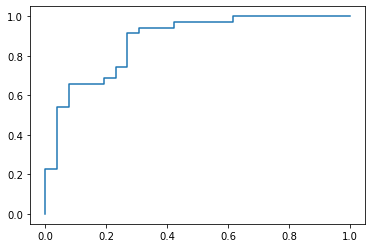

In [61]:
plt.plot(fpr,tpr)

## plotting the Roc curve....

In [62]:
auc(fpr,tpr)

0.8758241758241758

In [63]:
## Finding the optimal threshold...formula...

opt= np.sqrt(tpr*(1-fpr))

In [64]:
## Finding the index of the optimal threshold position..

ind=np.argmax(opt) 

In [65]:
## Getting the value of threshold at this index...

thresholds[ind] 

## here the value is 0.385..

0.3854713834255835

In [66]:
## Rerun the model..

sample= pd.DataFrame({"actual": y_test, "pred":y_prob[:,1]})

In [67]:
sample["new_pred"]= np.where(sample["pred"]>0.385, 1, 0)

In [68]:
sample.head()

,actual,pred,new_pred
58,1,0.959358,1
48,1,0.987257,1
40,1,0.814563,1
104,1,0.928849,1
68,1,0.872592,1


In [69]:
confusion_matrix(sample["actual"], sample["new_pred"])

 ## Here we see that FN has reduced to 3, so that is an improvement..

array([[19,  7],
       [ 3, 32]], dtype=int64)

### Random Forest...

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
x=df.drop("target", axis=1)
y= df["target"]

In [72]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
pred_rf= rf.predict(x_test)

In [74]:
accuracy_score(y_test,pred_rf)  ## Accuracy with Random Forest is better..

0.7868852459016393

In [75]:
accuracy_score(y_train,rf.predict(x_train)) ## Overfitting is present here too...


1.0

In [76]:
confusion_matrix(y_test,pred_rf) 

array([[20,  6],
       [ 7, 28]], dtype=int64)

In [77]:
rf.feature_importances_ 

array([0.07374043, 0.02821826, 0.17115222, 0.06873655, 0.07996134,
       0.0097883 , 0.02140795, 0.10330019, 0.06523614, 0.10386771,
       0.05219757, 0.12208357, 0.10030977])

In [78]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [79]:
## Correcting class imbalance..
from imblearn.over_sampling import SMOTE

In [80]:
sm= SMOTE(random_state=50)  
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [81]:
x_train_sm.shape

(258, 13)

In [82]:
y_train_sm.shape

(258,)

In [83]:
y_train_sm.value_counts()

0    129
1    129
Name: target, dtype: int64

In [84]:
## Cross Validation,,, to reduce Overfitting..

from sklearn.model_selection import cross_validate

In [85]:
res_lg= cross_validate(lg,x,y, cv= 5, return_train_score= True)

res_rf= cross_validate(rf,x,y, cv= 5, return_train_score= True)

import warnings
warnings.filterwarnings("ignore")

C:\Users\parul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\parul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [86]:
test_lg= np.average(res_lg["test_score"])
test_rf= np.average(res_rf["test_score"])

In [87]:
train_lg= np.average(res_lg["train_score"])
train_rf= np.average(res_rf["train_score"])

In [88]:
print(train_lg)
print(train_rf)

0.8650492095607147
1.0


In [89]:
print(test_lg)
print(test_rf)

## Overfitting has reduced in both the models...

0.8376502732240437
0.8108743169398908


## Feature Selection..

In [90]:
## Futher improving the model by reducing the less important features..

list(zip(x.columns, rf.feature_importances_))

## Here we see that features like..fbs,restecg,slope,sex,age,trestbps,exang & chol.. have very less importance..

[('age', 0.07374043280859674),
 ('sex', 0.028218256114291834),
 ('cp', 0.17115222111485204),
 ('trestbps', 0.06873654874177305),
 ('chol', 0.0799613397118947),
 ('fbs', 0.009788295182095858),
 ('restecg', 0.021407954670268334),
 ('thalach', 0.10330018589423115),
 ('exang', 0.06523613800268564),
 ('oldpeak', 0.10386771074606366),
 ('slope', 0.0521975727161693),
 ('ca', 0.1220835747954915),
 ('thal', 0.10030976950158625)]

In [91]:
df.corr()

## Here we can see that target is very less correlated to 'age','sex', trestbps', 'chol', 'fbs', 'restecg'...


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.201380,0.119492,-0.122349,-0.375282,0.093216,0.236475,-0.164124,0.340836,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.171883,0.046022,-0.051968,-0.056417,0.143460,0.102045,-0.032990,0.115548,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.073903,0.096018,0.047487,0.290642,-0.392937,-0.130459,0.116854,-0.208676,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.133294,0.178125,-0.123851,-0.045893,0.068526,0.175597,-0.122873,0.089552,0.062870,-0.146269
chol,0.201380,-0.171883,-0.073903,0.133294,1.000000,0.012004,-0.158680,0.003686,0.069901,0.047266,0.004213,0.096767,0.090679,-0.088572
fbs,0.119492,0.046022,0.096018,0.178125,0.012004,1.000000,-0.080770,-0.004935,0.024729,0.017937,-0.058654,0.142145,-0.032752,-0.026826
restecg,-0.122349,-0.051968,0.047487,-0.123851,-0.158680,-0.080770,1.000000,0.044423,-0.074556,-0.073590,0.104082,-0.099710,-0.005227,0.144740
thalach,-0.375282,-0.056417,0.290642,-0.045893,0.003686,-0.004935,0.044423,1.000000,-0.362828,-0.369640,0.376372,-0.244048,-0.086241,0.411755
exang,0.093216,0.143460,-0.392937,0.068526,0.069901,0.024729,-0.074556,-0.362828,1.000000,0.295668,-0.256106,0.155045,0.205826,-0.435601
oldpeak,0.236475,0.102045,-0.130459,0.175597,0.047266,0.017937,-0.073590,-0.369640,0.295668,1.000000,-0.587625,0.232539,0.212450,-0.430235


In [92]:
## For feature selection...

import statsmodels.api as sm
model = sm.OLS(y,x)
results = model.fit()


In [93]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.777
Method:                 Least Squares   F-statistic:                              82.08
Date:                Wed, 07 Sep 2022   Prob (F-statistic):                    7.80e-89
Time:                        21:54:36   Log-Likelihood:                         -102.90
No. Observations:                 302   AIC:                                      231.8
Df Residuals:                     289   BIC:                                      280.0
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [94]:
## As we can see...R-squared: 0.787 & Adj. R-squared: 0.777

In [95]:
## We have p-values > 0.05 for columns age, trestbps, chol, fbs, restecg.. 
## So we see the change in the Adjusted R-squared value by dropping these features...

x.drop('age' ,axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()

In [96]:
print(results.summary())

## Adj. R-squared has increased to 0.778..

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.778
Method:                 Least Squares   F-statistic:                              89.20
Date:                Wed, 07 Sep 2022   Prob (F-statistic):                    8.31e-90
Time:                        21:54:36   Log-Likelihood:                         -102.93
No. Observations:                 302   AIC:                                      229.9
Df Residuals:                     290   BIC:                                      274.4
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [97]:

x.drop('trestbps',  axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()

print(results.summary())



                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.776
Method:                 Least Squares   F-statistic:                              96.13
Date:                Wed, 07 Sep 2022   Prob (F-statistic):                    4.83e-90
Time:                        21:54:36   Log-Likelihood:                         -104.78
No. Observations:                 302   AIC:                                      231.6
Df Residuals:                     291   BIC:                                      272.4
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [98]:
x.drop('chol',  axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()

print(results.summary())

## the difference between the R-squared and Adj. R-squared has increased..

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              105.1
Date:                Wed, 07 Sep 2022   Prob (F-statistic):                    1.30e-90
Time:                        21:54:36   Log-Likelihood:                         -105.87
No. Observations:                 302   AIC:                                      231.7
Df Residuals:                     292   BIC:                                      268.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [99]:
x.drop('fbs',  axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.776
Method:                 Least Squares   F-statistic:                              117.2
Date:                Wed, 07 Sep 2022   Prob (F-statistic):                    1.20e-91
Time:                        21:54:36   Log-Likelihood:                         -105.90
No. Observations:                 302   AIC:                                      229.8
Df Residuals:                     293   BIC:                                      263.2
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [100]:
x.drop('restecg',  axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()

print(results.summary())

## Difference between R-squared and Adj. R-Squared has reduced...Thus these features can be ommitted in the model building..

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              131.1
Date:                Wed, 07 Sep 2022   Prob (F-statistic):                    2.91e-92
Time:                        21:54:36   Log-Likelihood:                         -107.00
No. Observations:                 302   AIC:                                      230.0
Df Residuals:                     294   BIC:                                      259.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [101]:
x.drop('sex',  axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()

print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              140.5
Date:                Wed, 07 Sep 2022   Prob (F-statistic):                    4.97e-90
Time:                        21:54:36   Log-Likelihood:                         -114.90
No. Observations:                 302   AIC:                                      243.8
Df Residuals:                     295   BIC:                                      269.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Rebulding the model.. After Feature selection...

In [102]:
df_final= df_new1.drop(["age", "chol","restecg","trestbps", "fbs","sex"], axis= 1)
df_final.head()

,cp,thalach,exang,oldpeak,slope,ca,thal
0,1.000000,0.714506,0.0,0.604799,0.0,0.0,0.333333
1,0.666667,0.925942,0.0,0.761913,0.0,0.0,0.666667
2,0.333333,0.845723,0.0,0.443482,1.0,0.0,0.666667
3,0.333333,0.878615,0.0,0.297752,1.0,0.0,0.666667
4,0.000000,0.794181,1.0,0.238087,1.0,0.0,0.666667


In [103]:
x= df_final
y= df["target"]

In [104]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state= 25)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
lg= LogisticRegression()

lg.fit(x_train, y_train)

LogisticRegression()

In [107]:
pred_new= lg.predict(x_test)

In [108]:
accuracy_score(y_test,pred_new)

## Accuracy of the model has improved..from 0.803 to 0.852...

0.8524590163934426

## Saving the Model for prediction..

In [109]:
import joblib

In [110]:
joblib.dump(mn,"ML- Healthcare project.pkl") ## Also saving the preprocessing functions like Scaling...


joblib.dump(lg,"ML- Healthcare project.pkl")


['ML- Healthcare project.pkl']

In [111]:

model= joblib.load("ML- Healthcare project.pkl")
model

LogisticRegression()

In [112]:
test = df_final[:5]
test

,cp,thalach,exang,oldpeak,slope,ca,thal
0,1.000000,0.714506,0.0,0.604799,0.0,0.0,0.333333
1,0.666667,0.925942,0.0,0.761913,0.0,0.0,0.666667
2,0.333333,0.845723,0.0,0.443482,1.0,0.0,0.666667
3,0.333333,0.878615,0.0,0.297752,1.0,0.0,0.666667
4,0.000000,0.794181,1.0,0.238087,1.0,0.0,0.666667


In [113]:
model.predict(test)  ## Final model predictions..match with the data set..!!!

array([1, 1, 1, 1, 1], dtype=int64)